In [484]:
!pip install fredapi > /dev/null

In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import getpass

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred


fred_key = getpass.getpass('Enter your FRED API key: ')

Enter your FRED API key:  ········


In [486]:
# Create the Fred Object
fred = Fred(api_key=fred_key)

In [487]:
# Search economic data
sp_search = fred.search('S&P', order_by='popularity')


In [488]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-11-15   2024-11-15   
CSUSHPINSA          CSUSHPINSA     2024-11-15   2024-11-15   
SP500                    SP500     2024-11-15   2024-11-15   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-11-15   2024-11-15   
BAMLC0A0CM          BAMLC0A0CM     2024-11-15   2024-11-15   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM      ICE BofA US Corporate Index Option-Adjusted Sp...   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-11-14  Daily, Close   
CSUSHPINSA            1987-01-01      2024-08-01       Monthly   
SP500                 2014-11-17      2024-11-14  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2024-11-14  Daily, Close   
BAMLC0A0CM            1996-12-31      2024-11-14  Daily, Close   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
SP500                        D               Index               Index   
BAMLH0A0HYM2EY               D             Percent                   %   
BAMLC0A0CM                   D             Percent                   %   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
BAMLC0A0CM      Not Seasonally Adjusted                       NSA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2024-11-15 08:38:12-06:00         92   
CSUSHPINSA      2024-10-29 08:11:02-05:00         88   
SP500           2024-11-14 19:11:44-06:00         83   
BAMLH0A0HYM2EY  2024-11-15 08:38:14-06:00         82   
BAMLC0A0CM      2024-11-15 08:44:02-06:00         78   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
SP500           The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
BAMLC0A0CM      The ICE BofA Option-Adjusted Spreads (OASs) ar...

In [489]:
# Pull raw data
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500 returns'}>

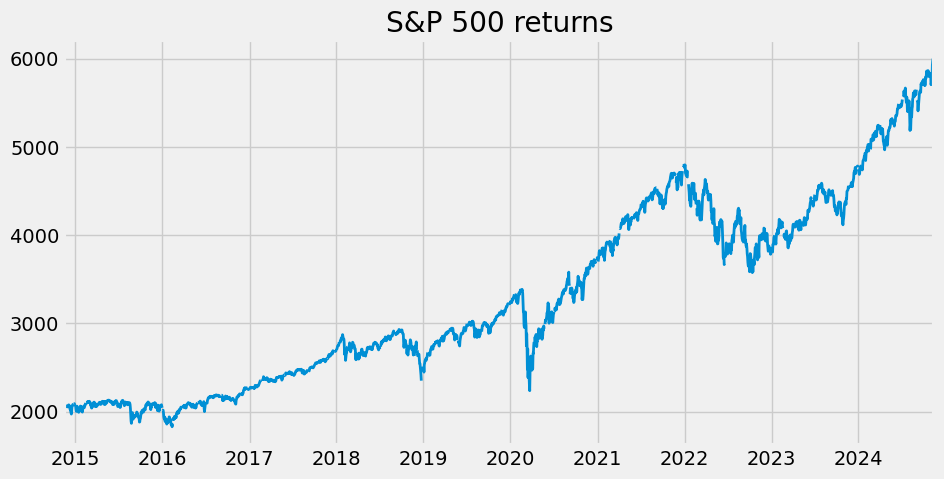

In [706]:
sp500.plot(figsize=(10, 5), title='S&P 500 returns', lw= 2)

In [491]:
# Pull and join multiple data series
unemp_results = fred.search('unemployment')


In [492]:
unemp_results

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-11-15   2024-11-15   
UNRATENSA                          UNRATENSA     2024-11-15   2024-11-15   
UNEMPLOY                            UNEMPLOY     2024-11-15   2024-11-15   
NROU                                    NROU     2024-11-15   2024-11-15   
CCSA                                    CCSA     2024-11-15   2024-11-15   
...                                      ...            ...          ...   
LAUCN340030000000003A  LAUCN340030000000003A     2024-11-15   2024-11-15   
LMUNRRTTLUM156S              LMUNRRTTLUM156S     2024-11-15   2024-11-15   
LNS14000315                      LNS14000315     2024-11-15   2024-11-15   
LNU04032222                      LNU04032222     2024-11-15   2024-11-15   
LNU04032223                      LNU04032223     2024-11-15   2024-11-15   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   
LMUNRRTTLUM156S        Infra-Annual Registered Unemployment and Job V...   
LNS14000315                            Unemployment Rate - Married Women   
LNU04032222            Unemployment Rate - Natural Resources, Constru...   
LNU04032223            Unemployment Rate - Farming, Fishing, and Fore...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-10-01   
UNRATENSA                    1948-01-01      2024-10-01   
UNEMPLOY                     1948-01-01      2024-10-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-11-02   
...                                 ...             ...   
LAUCN340030000000003A        1990-01-01      2023-01-01   
LMUNRRTTLUM156S              1995-01-01      2023-12-01   
LNS14000315                  1955-01-01      2024-10-01   
LNU04032222                  2000-01-01      2024-10-01   
LNU04032223                  2000-01-01      2024-10-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN340030000000003A                   Annual               A   
LMUNRRTTLUM156S                        Monthly               M   
LNS14000315                            Monthly               M   
LNU04032222                            Monthly               M   
LNU04032223                            Monthly               M   

                                             units  \
series id                                            
UNRATE                                     Percent   
UNRATENSA                                  Percent   
UNEMPLOY                      Thousands of Persons   
NROU                                       Percent   
CCSA                                        Number   
...                                            ...   
LAUCN

In [493]:
unrate = fred.get_series('UNRATE')

Text(0.5, 1.0, 'Unemployment rates')

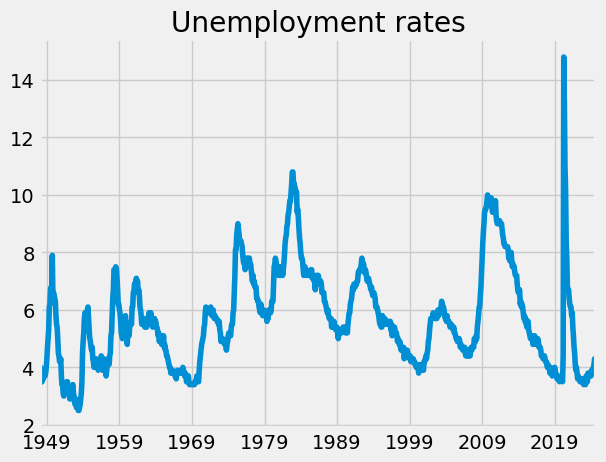

In [708]:
unrate.plot()
plt.title("Unemployment rates")

In [ ]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1).drop('M08311USM156SNBR', axis=1)

In [543]:
unemp_states = unemp_results.drop('UNRATE', axis=1)
unemp_states = unemp_results.drop('PRUR', axis=1)


In [549]:
columns_with_digits = [col for col in unemp_results.columns if any(char.isdigit() for char in col)]
unemp_states = unemp_results.drop(columns_with_digits, axis=1)
unemp_df = unemp_df.drop(unemp_df[unemp_df['id'].str.contains(r'\d')].index)
unemp_df = unemp_df.drop(unemp_df[unemp_df['id'] == 'PRUR'].index)
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
valid_columns = [col for col in unemp_states.columns if col in id_to_state]
unemp_states = unemp_states[valid_columns]
unemp_states.columns = [id_to_state.get(c, c) for c in unemp_states.columns]

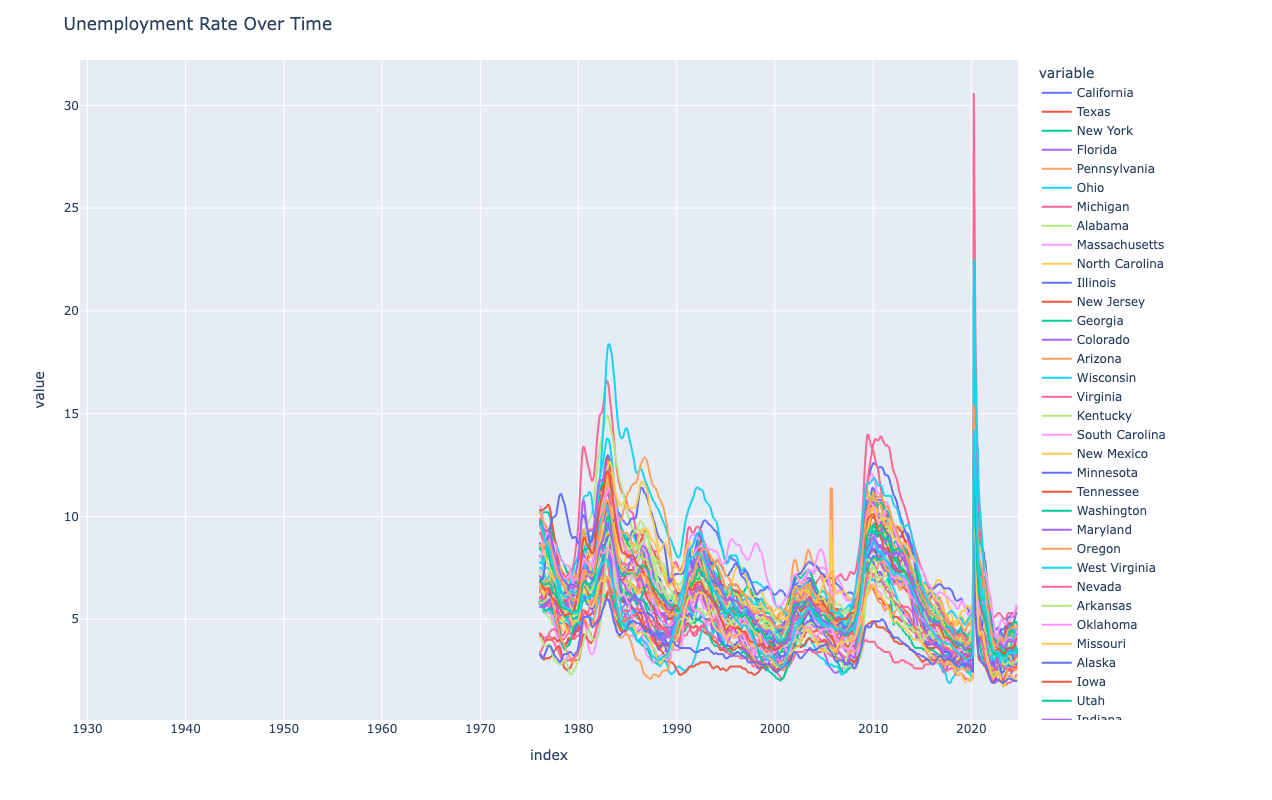

In [712]:
fig = px.line(unemp_states, height=800)
fig.update_layout(
    title="Unemployment Rate Over Time" 
)

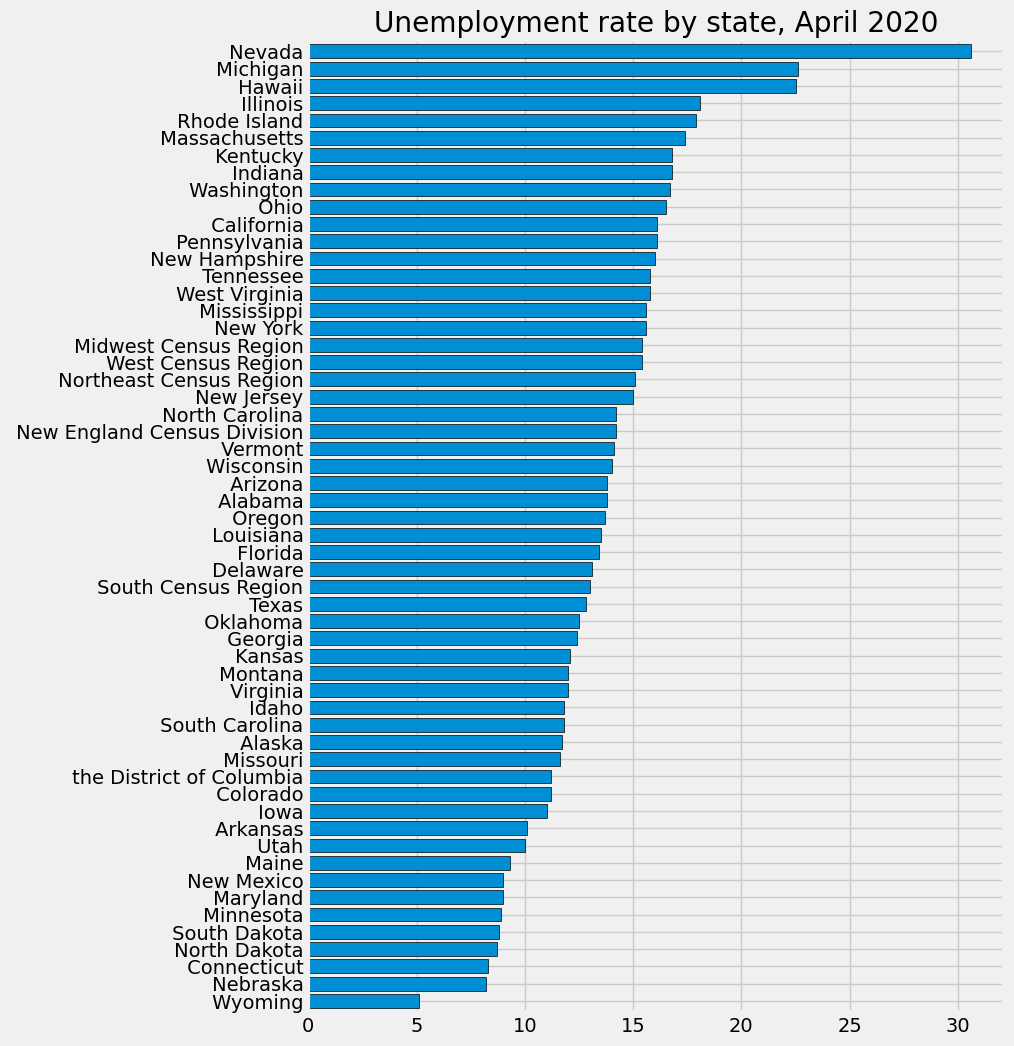

In [555]:
# Show April 2020 unemployment rate per state
ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T.sort_values('2020-04-01').plot(kind='barh', figsize=(8,12), width=0.8, edgecolor='black', title='Unemployment rate by state, April 2020')
ax.legend().remove()
plt.show()

In [647]:
# Show participation rate
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [658]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for', '').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state.get(c, c) for c in part_states.columns]

Text(0.5, 1.0, 'New York')

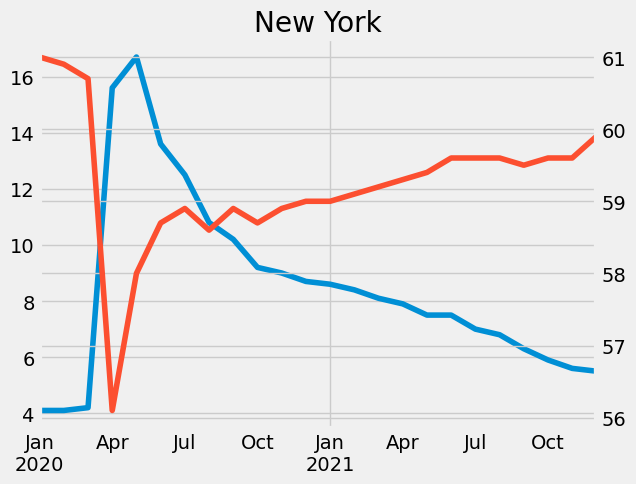

In [692]:
# Plot unemployment vs participation for a state
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.columns = unemp_states.columns.str.strip()
part_states.columns = part_states.columns.str.strip()
unemp_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax, label="Unemployment")
part_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax2, label="Participation", color=color_pal[1])
ax.set_title('New York')